In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import matplotlib.pyplot as plt
from pprint import pprint
sb.set()

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
d1 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Table2.1')
d2 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Figure2.6')
d3 = pd.read_excel("Data/World Happiness Report/WHR2019.xlsx", sheet_name='Figure2.7')

In [4]:
print(d1.shape)
data=d1.rename(columns={'Country name':'Country', 
                      'Life Ladder':'Happiness',
                      'Log GDP per capita':'LogGDP',
                      'Healthy life expectancy at birth':'Life_expectancy',
                      'Freedom to make life choices': 'Freedom',
                      'Positive affect':'Pos_affect',
                      'Negative affect':'Neg_affect',
                      'GINI index (World Bank estimate)':'GINI',
                      'GINI index (World Bank estimate), average 2000-16':'GINI_average',
                      'gini of household income reported in Gallup, by wp5-year':'GINI_householdincome',
                       })
data = data.iloc[:,0:20]
data = data.drop(['GINI','GINI_average', 'Most people can be trusted, Gallup'], axis=1)
data.head()

(1704, 26)


,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.344540


In [5]:
for i in range(5, 19):
    new = str(i)
    if i<10:
        new = str(0) + str(i)
    dfname = 'WHR' + new
    print(dfname + " = data.loc[(data['Year'] == " + str(i+2000) + ')].reset_index(drop=True)')

WHR05 = data.loc[(data['Year'] == 2005)].reset_index(drop=True)
WHR06 = data.loc[(data['Year'] == 2006)].reset_index(drop=True)
WHR07 = data.loc[(data['Year'] == 2007)].reset_index(drop=True)
WHR08 = data.loc[(data['Year'] == 2008)].reset_index(drop=True)
WHR09 = data.loc[(data['Year'] == 2009)].reset_index(drop=True)
WHR10 = data.loc[(data['Year'] == 2010)].reset_index(drop=True)
WHR11 = data.loc[(data['Year'] == 2011)].reset_index(drop=True)
WHR12 = data.loc[(data['Year'] == 2012)].reset_index(drop=True)
WHR13 = data.loc[(data['Year'] == 2013)].reset_index(drop=True)
WHR14 = data.loc[(data['Year'] == 2014)].reset_index(drop=True)
WHR15 = data.loc[(data['Year'] == 2015)].reset_index(drop=True)
WHR16 = data.loc[(data['Year'] == 2016)].reset_index(drop=True)
WHR17 = data.loc[(data['Year'] == 2017)].reset_index(drop=True)
WHR18 = data.loc[(data['Year'] == 2018)].reset_index(drop=True)


In [6]:
WHR05 = data.loc[(data['Year'] == 2005)].reset_index(drop=True)
WHR06 = data.loc[(data['Year'] == 2006)].reset_index(drop=True)
WHR07 = data.loc[(data['Year'] == 2007)].reset_index(drop=True)
WHR08 = data.loc[(data['Year'] == 2008)].reset_index(drop=True)
WHR09 = data.loc[(data['Year'] == 2009)].reset_index(drop=True)
WHR10 = data.loc[(data['Year'] == 2010)].reset_index(drop=True)
WHR11 = data.loc[(data['Year'] == 2011)].reset_index(drop=True)
WHR12 = data.loc[(data['Year'] == 2012)].reset_index(drop=True)
WHR13 = data.loc[(data['Year'] == 2013)].reset_index(drop=True)
WHR14 = data.loc[(data['Year'] == 2014)].reset_index(drop=True)
WHR15 = data.loc[(data['Year'] == 2015)].reset_index(drop=True)
WHR16 = data.loc[(data['Year'] == 2016)].reset_index(drop=True)
WHR17 = data.loc[(data['Year'] == 2017)].reset_index(drop=True)
WHR18 = data.loc[(data['Year'] == 2018)].reset_index(drop=True)

In [7]:
WHR09

,Country,Year,Happiness,LogGDP,Social support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,Pos_affect,Neg_affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI_householdincome
0,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.441906
1,Albania,2009,5.485470,9.161638,0.833047,66.199997,0.525223,-0.160855,0.863665,0.640024,0.279257,NaN,0.048114,-0.264635,1.919640,0.349950,0.617361
2,Argentina,2009,6.424133,9.750825,0.918693,67.180000,0.636646,-0.125714,0.884742,0.863786,0.236901,0.273822,0.023821,-0.570944,2.067742,0.321871,0.368422
3,Armenia,2009,4.177582,8.784616,0.680007,65.099998,0.441413,-0.199945,0.881887,0.542872,0.411280,0.373952,-0.324350,-0.207272,2.179482,0.521709,0.427577
4,Azerbaijan,2009,4.573725,9.641726,0.735970,63.020000,0.498138,-0.106351,0.753850,0.543640,0.233942,0.774252,-0.767848,-0.758656,1.893334,0.413959,0.331236
5,Bahrain,2009,5.700523,10.614406,0.904143,65.940002,0.895931,0.029429,0.506104,0.763664,0.421889,NaN,-0.463725,0.469330,2.365018,0.414877,0.346116
6,Bangladesh,2009,5.082851,7.757849,0.527814,60.279999,0.630931,-0.068619,0.776004,0.670300,0.223254,0.829860,-0.916896,-0.877776,1.692142,0.332912,0.418037
7,Belarus,2009,5.564131,9.618182,0.907778,62.000000,0.679293,-0.210205,0.675543,0.565597,0.223292,0.548333,-0.529404,-0.977223,1.937372,0.348189,0.338963
8,Bolivia,2009,6.085579,8.571310,0.831320,60.500000,0.778939,-0.030179,0.762605,0.796764,0.372369,0.468150,-0.250256,-0.805518,1.977046,0.324874,0.417889
9,Bosnia and Herzegovina,2009,4.963477,9.166780,0.735232,66.480003,0.257534,-0.026552,0.958740,0.571649,0.390204,NaN,-0.331738,-0.386236,2.110414,0.425189,0.422993


## GINI_householdincome only available starting from WHR09

In [8]:
Country_id = {}

data['Country'] = data['Country'].astype('category')
countryno = 0
for i in range(1703):
    if (data['Country'][i] != data['Country'][i+1]):
#         print(str(countryno) + '\t' + data['Country'][i] + '\t')
        Country_id[countryno] = data['Country'][i]
        countryno+=1
        
pprint(Country_id)

{0: 'Afghanistan',
 1: 'Albania',
 2: 'Algeria',
 3: 'Angola',
 4: 'Argentina',
 5: 'Armenia',
 6: 'Australia',
 7: 'Austria',
 8: 'Azerbaijan',
 9: 'Bahrain',
 10: 'Bangladesh',
 11: 'Belarus',
 12: 'Belgium',
 13: 'Belize',
 14: 'Benin',
 15: 'Bhutan',
 16: 'Bolivia',
 17: 'Bosnia and Herzegovina',
 18: 'Botswana',
 19: 'Brazil',
 20: 'Bulgaria',
 21: 'Burkina Faso',
 22: 'Burundi',
 23: 'Cambodia',
 24: 'Cameroon',
 25: 'Canada',
 26: 'Central African Republic',
 27: 'Chad',
 28: 'Chile',
 29: 'China',
 30: 'Colombia',
 31: 'Comoros',
 32: 'Congo (Brazzaville)',
 33: 'Congo (Kinshasa)',
 34: 'Costa Rica',
 35: 'Croatia',
 36: 'Cuba',
 37: 'Cyprus',
 38: 'Czech Republic',
 39: 'Denmark',
 40: 'Djibouti',
 41: 'Dominican Republic',
 42: 'Ecuador',
 43: 'Egypt',
 44: 'El Salvador',
 45: 'Estonia',
 46: 'Ethiopia',
 47: 'Finland',
 48: 'France',
 49: 'Gabon',
 50: 'Gambia',
 51: 'Georgia',
 52: 'Germany',
 53: 'Ghana',
 54: 'Greece',
 55: 'Guatemala',
 56: 'Guinea',
 57: 'Guyana',
 58: 

In [9]:
data.columns

Index(['Country', 'Year', 'Happiness', 'LogGDP', 'Social support',
       'Life_expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
       'Pos_affect', 'Neg_affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI_householdincome'],
      dtype='object')

Intercept of Regression 	: b =  [4.33214372]
Coefficients of Regression 	: a =  [[ 1.00241922e-01  3.37608123e-01 -2.04130286e-03  2.87673669e-01
   3.71375387e-01 -9.22508706e-01  6.05599517e-01  5.23541477e-01
  -3.28939124e-01 -2.51888029e-02  1.28282025e-01  1.85040364e+00
  -9.31592352e+00  4.91310235e-02]]

                                           Predictors  Coefficients
0                                              LogGDP      0.100242
1                                      Social support      0.337608
2                                     Life_expectancy     -0.002041
3                                             Freedom      0.287674
4                                          Generosity      0.371375
5                           Perceptions of corruption     -0.922509
6                                          Pos_affect      0.605600
7                                          Neg_affect      0.523541
8                   Confidence in national government     -0.328939
9    

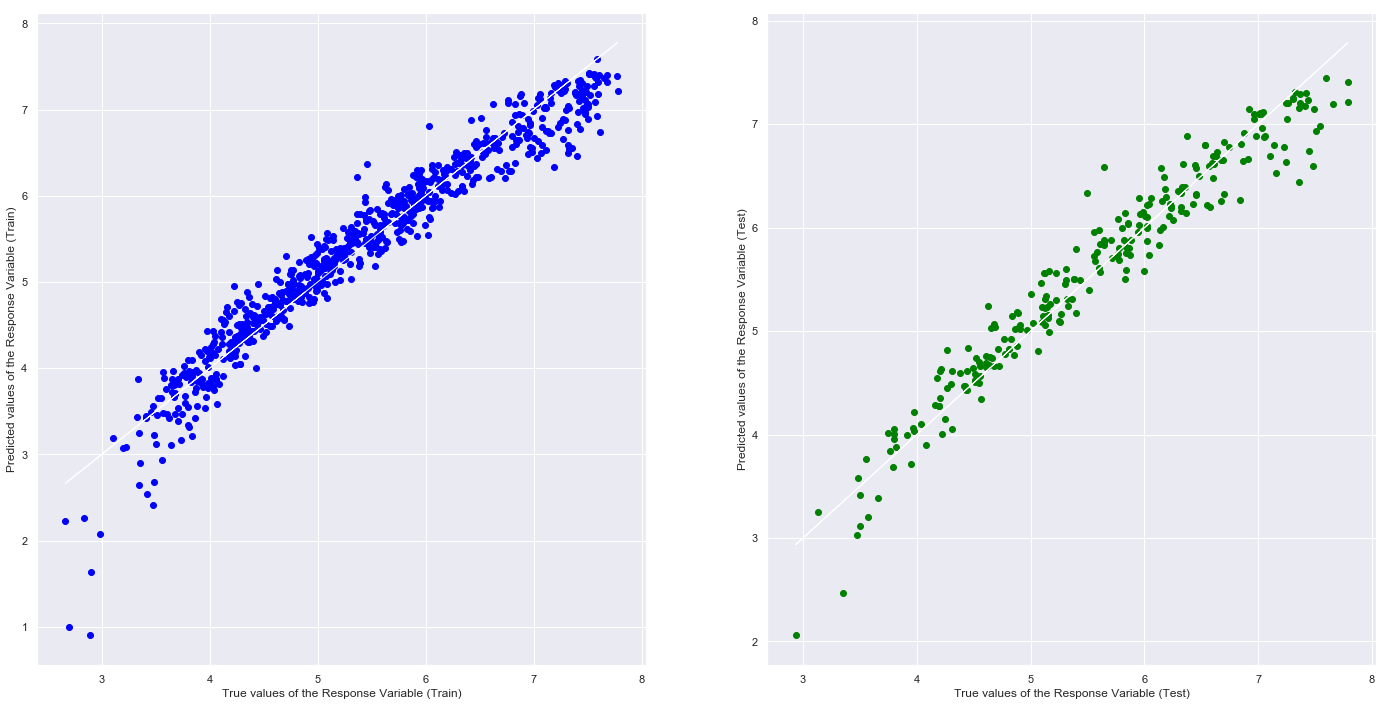

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9412092470679148
Mean Squared Error (MSE) 	: 0.08063441679881977

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9433108371309958
Mean Squared Error (MSE) 	: 0.07013296120942938



In [10]:
data = data.dropna()
# Extract Response and Predictors
y = pd.DataFrame(data["Happiness"])
X = pd.DataFrame(data[['LogGDP', 'Social support',
                       'Life_expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
                       'Pos_affect', 'Neg_affect', 'Confidence in national government',
                       'Democratic Quality', 'Delivery Quality',
                       'Standard deviation of ladder by country-year',
                       'Standard deviation/Mean of ladder by country-year',
                       'GINI_householdincome']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [-2.71288344]
Coefficients of Regression 	: a =  [[0.28410014 3.12729809 0.04743285]]

        Predictors  Coefficients
0           LogGDP      0.284100
1   Social support      3.127298
2  Life_expectancy      0.047433



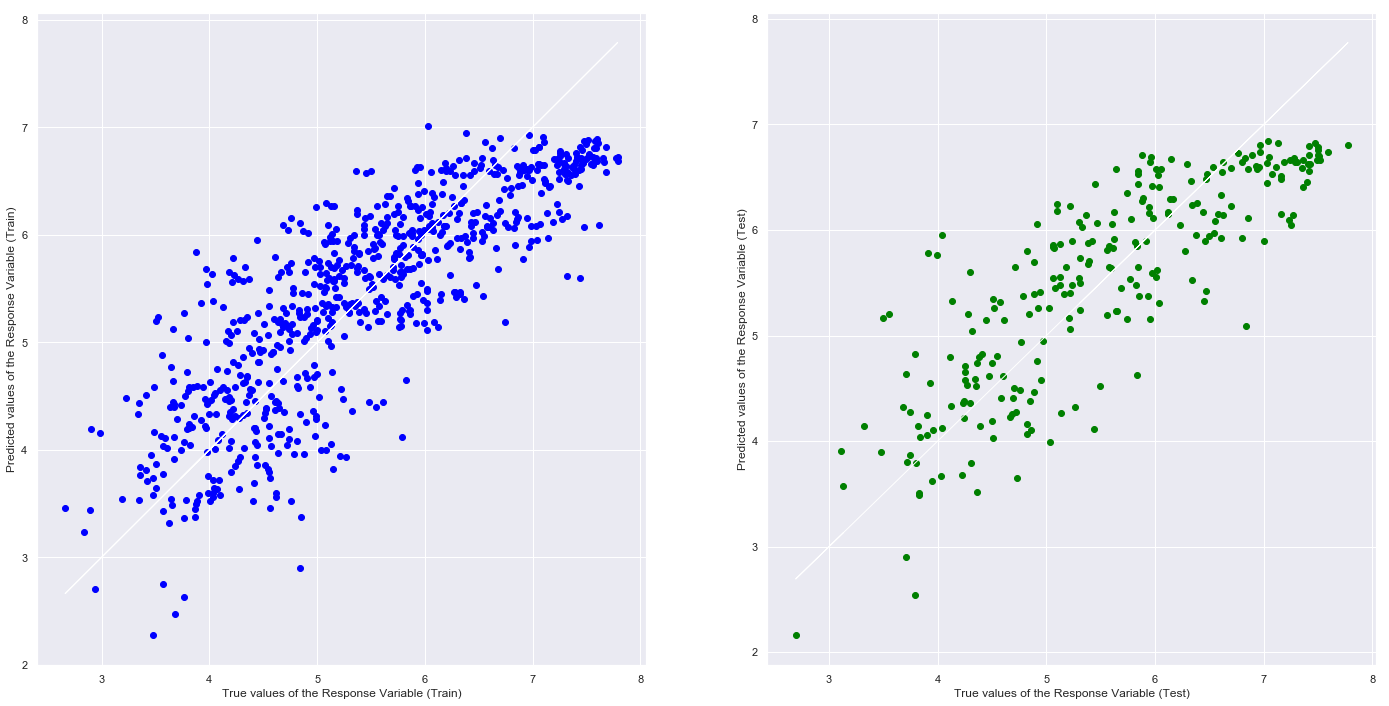

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6912065427465468
Mean Squared Error (MSE) 	: 0.4149202913911997

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6905899930287696
Mean Squared Error (MSE) 	: 0.4132228690935654



In [11]:
# Extract Response and Predictors
predictors = ['LogGDP', 'Social support', 'Life_expectancy']
# predictors = ['LogGDP', 'Social support',
#                        'Life_expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption',
#                        'Pos_affect', 'Neg_affect', 'Confidence in national government',
#                        'Democratic Quality', 'Delivery Quality',
#                        'Standard deviation of ladder by country-year',
#                        'Standard deviation/Mean of ladder by country-year',
#                        'GINI_householdincome']


y = pd.DataFrame(data["Happiness"])
X = pd.DataFrame(data[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [12]:
Stocks = pd.read_csv('Data\Stocks\S&P 500 (^GSPC)_2005to2018_daily.csv')

In [43]:
# Stocks2015 = Stocks.loc[(Stocks['Date'].str.contains('2015'))]
# Stocks2015['Log10_volume'] = np.log10(Stocks2015['Volume'])
# Stocks2015 = Stocks2015.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
# temp = Stocks2015['Log10_volume'].sum()

# Stocks2015 = Stocks2015.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
# Stocks2015 = Stocks2015.append([0]).rename(index={'mean':'2015'})
# Stocks2015['Log10_volume'] = temp
# Stocks2015 = Stocks2015.drop(0, axis=1).drop(0, axis=0)
# Stocks2015

In [44]:
for i in range(2005, 2019):
    print('Stocks' + str(i) + " = Stocks.loc[(Stocks['Date'].str.contains('" + str(i) + "'))]\nStocks" + str(i) + "['Log10_volume'] = np.log10(Stocks" + str(i) + "['Volume'])\nStocks" + str(i) + ' = Stocks' + str(i) + ".drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)\ntemp = Stocks" + str(i) + "['Log10_volume'].sum()\nStocks" + str(i) + ' = Stocks' + str(i) + ".describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])\nStocks" + str(i) + ' = Stocks' + str(i) + ".append([0]).rename(index={'mean':'" + str(i) +"'})\nStocks" + str(i) + "['Log10_volume'] = temp\nStocks" + str(i) + ' = Stocks' + str(i) + '.drop(0, axis=1).drop(0, axis=0)\nStocks' + str(i) + "\n")

Stocks2005 = Stocks.loc[(Stocks['Date'].str.contains('2005'))]
Stocks2005['Log10_volume'] = np.log10(Stocks2005['Volume'])
Stocks2005 = Stocks2005.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2005['Log10_volume'].sum()
Stocks2005 = Stocks2005.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2005 = Stocks2005.append([0]).rename(index={'mean':'2005'})
Stocks2005['Log10_volume'] = temp
Stocks2005 = Stocks2005.drop(0, axis=1).drop(0, axis=0)
Stocks2005

Stocks2006 = Stocks.loc[(Stocks['Date'].str.contains('2006'))]
Stocks2006['Log10_volume'] = np.log10(Stocks2006['Volume'])
Stocks2006 = Stocks2006.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2006['Log10_volume'].sum()
Stocks2006 = Stocks2006.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2006 = Stocks2006.append([0]).rename(index={'mean':'2006'})
Stocks2006['Log10_volume'] = temp
Stocks2006 = Stocks2006.drop(0, axis=1).drop(0, ax

In [46]:
Stocks2005 = Stocks.loc[(Stocks['Date'].str.contains('2005'))]
Stocks2005['Log10_volume'] = np.log10(Stocks2005['Volume'])
Stocks2005 = Stocks2005.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2005['Log10_volume'].sum()
Stocks2005 = Stocks2005.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2005 = Stocks2005.append([0]).rename(index={'mean':'2005'})
Stocks2005['Log10_volume'] = temp
Stocks2005 = Stocks2005.drop(0, axis=1).drop(0, axis=0)
Stocks2005

Stocks2006 = Stocks.loc[(Stocks['Date'].str.contains('2006'))]
Stocks2006['Log10_volume'] = np.log10(Stocks2006['Volume'])
Stocks2006 = Stocks2006.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2006['Log10_volume'].sum()
Stocks2006 = Stocks2006.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2006 = Stocks2006.append([0]).rename(index={'mean':'2006'})
Stocks2006['Log10_volume'] = temp
Stocks2006 = Stocks2006.drop(0, axis=1).drop(0, axis=0)
Stocks2006

Stocks2007 = Stocks.loc[(Stocks['Date'].str.contains('2007'))]
Stocks2007['Log10_volume'] = np.log10(Stocks2007['Volume'])
Stocks2007 = Stocks2007.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2007['Log10_volume'].sum()
Stocks2007 = Stocks2007.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2007 = Stocks2007.append([0]).rename(index={'mean':'2007'})
Stocks2007['Log10_volume'] = temp
Stocks2007 = Stocks2007.drop(0, axis=1).drop(0, axis=0)
Stocks2007

Stocks2008 = Stocks.loc[(Stocks['Date'].str.contains('2008'))]
Stocks2008['Log10_volume'] = np.log10(Stocks2008['Volume'])
Stocks2008 = Stocks2008.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2008['Log10_volume'].sum()
Stocks2008 = Stocks2008.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2008 = Stocks2008.append([0]).rename(index={'mean':'2008'})
Stocks2008['Log10_volume'] = temp
Stocks2008 = Stocks2008.drop(0, axis=1).drop(0, axis=0)
Stocks2008

Stocks2009 = Stocks.loc[(Stocks['Date'].str.contains('2009'))]
Stocks2009['Log10_volume'] = np.log10(Stocks2009['Volume'])
Stocks2009 = Stocks2009.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2009['Log10_volume'].sum()
Stocks2009 = Stocks2009.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2009 = Stocks2009.append([0]).rename(index={'mean':'2009'})
Stocks2009['Log10_volume'] = temp
Stocks2009 = Stocks2009.drop(0, axis=1).drop(0, axis=0)
Stocks2009

Stocks2010 = Stocks.loc[(Stocks['Date'].str.contains('2010'))]
Stocks2010['Log10_volume'] = np.log10(Stocks2010['Volume'])
Stocks2010 = Stocks2010.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2010['Log10_volume'].sum()
Stocks2010 = Stocks2010.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2010 = Stocks2010.append([0]).rename(index={'mean':'2010'})
Stocks2010['Log10_volume'] = temp
Stocks2010 = Stocks2010.drop(0, axis=1).drop(0, axis=0)
Stocks2010

Stocks2011 = Stocks.loc[(Stocks['Date'].str.contains('2011'))]
Stocks2011['Log10_volume'] = np.log10(Stocks2011['Volume'])
Stocks2011 = Stocks2011.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2011['Log10_volume'].sum()
Stocks2011 = Stocks2011.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2011 = Stocks2011.append([0]).rename(index={'mean':'2011'})
Stocks2011['Log10_volume'] = temp
Stocks2011 = Stocks2011.drop(0, axis=1).drop(0, axis=0)
Stocks2011

Stocks2012 = Stocks.loc[(Stocks['Date'].str.contains('2012'))]
Stocks2012['Log10_volume'] = np.log10(Stocks2012['Volume'])
Stocks2012 = Stocks2012.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2012['Log10_volume'].sum()
Stocks2012 = Stocks2012.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2012 = Stocks2012.append([0]).rename(index={'mean':'2012'})
Stocks2012['Log10_volume'] = temp
Stocks2012 = Stocks2012.drop(0, axis=1).drop(0, axis=0)
Stocks2012

Stocks2013 = Stocks.loc[(Stocks['Date'].str.contains('2013'))]
Stocks2013['Log10_volume'] = np.log10(Stocks2013['Volume'])
Stocks2013 = Stocks2013.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2013['Log10_volume'].sum()
Stocks2013 = Stocks2013.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2013 = Stocks2013.append([0]).rename(index={'mean':'2013'})
Stocks2013['Log10_volume'] = temp
Stocks2013 = Stocks2013.drop(0, axis=1).drop(0, axis=0)
Stocks2013

Stocks2014 = Stocks.loc[(Stocks['Date'].str.contains('2014'))]
Stocks2014['Log10_volume'] = np.log10(Stocks2014['Volume'])
Stocks2014 = Stocks2014.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2014['Log10_volume'].sum()
Stocks2014 = Stocks2014.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2014 = Stocks2014.append([0]).rename(index={'mean':'2014'})
Stocks2014['Log10_volume'] = temp
Stocks2014 = Stocks2014.drop(0, axis=1).drop(0, axis=0)
Stocks2014

Stocks2015 = Stocks.loc[(Stocks['Date'].str.contains('2015'))]
Stocks2015['Log10_volume'] = np.log10(Stocks2015['Volume'])
Stocks2015 = Stocks2015.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2015['Log10_volume'].sum()
Stocks2015 = Stocks2015.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2015 = Stocks2015.append([0]).rename(index={'mean':'2015'})
Stocks2015['Log10_volume'] = temp
Stocks2015 = Stocks2015.drop(0, axis=1).drop(0, axis=0)
Stocks2015

Stocks2016 = Stocks.loc[(Stocks['Date'].str.contains('2016'))]
Stocks2016['Log10_volume'] = np.log10(Stocks2016['Volume'])
Stocks2016 = Stocks2016.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2016['Log10_volume'].sum()
Stocks2016 = Stocks2016.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2016 = Stocks2016.append([0]).rename(index={'mean':'2016'})
Stocks2016['Log10_volume'] = temp
Stocks2016 = Stocks2016.drop(0, axis=1).drop(0, axis=0)
Stocks2016

Stocks2017 = Stocks.loc[(Stocks['Date'].str.contains('2017'))]
Stocks2017['Log10_volume'] = np.log10(Stocks2017['Volume'])
Stocks2017 = Stocks2017.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2017['Log10_volume'].sum()
Stocks2017 = Stocks2017.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2017 = Stocks2017.append([0]).rename(index={'mean':'2017'})
Stocks2017['Log10_volume'] = temp
Stocks2017 = Stocks2017.drop(0, axis=1).drop(0, axis=0)
Stocks2017

Stocks2018 = Stocks.loc[(Stocks['Date'].str.contains('2018'))]
Stocks2018['Log10_volume'] = np.log10(Stocks2018['Volume'])
Stocks2018 = Stocks2018.drop(['Volume', 'Adj Close'], axis=1).reset_index(drop=True)
temp = Stocks2018['Log10_volume'].sum()
Stocks2018 = Stocks2018.describe().drop(['count', '25%', '50%', '75%', 'std', 'min', 'max'])
Stocks2018 = Stocks2018.append([0]).rename(index={'mean':'2018'})
Stocks2018['Log10_volume'] = temp
Stocks2018 = Stocks2018.drop(0, axis=1).drop(0, axis=0)
Stocks2018;

C:\Users\wilso\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\wilso\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\wilso\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\wilso\Anaconda3\lib\site-packages\ipykernel_launcher.py:22

In [54]:
for i in range(2006, 2019):
    print("Stocks" + str(i) + ",")

Stocks2006,
Stocks2007,
Stocks2008,
Stocks2009,
Stocks2010,
Stocks2011,
Stocks2012,
Stocks2013,
Stocks2014,
Stocks2015,
Stocks2016,
Stocks2017,
Stocks2018,


In [59]:
stock_aggregate = Stocks2005.append([Stocks2006,
                                    Stocks2007,
                                    Stocks2008,
                                    Stocks2009,
                                    Stocks2010,
                                    Stocks2011,
                                    Stocks2012,
                                    Stocks2013,
                                    Stocks2014,
                                    Stocks2015,
                                    Stocks2016,
                                    Stocks2017,
                                    Stocks2018,])
stock_aggregate

,Open,High,Low,Close,Log10_volume
2005,1207.087063,1212.572896,1202.005837,1207.229443,2337.654564
2006,1309.762590,1315.611637,1304.494979,1310.461236,2352.813144
2007,1476.958364,1485.241034,1467.946455,1477.184342,2384.140989
2008,1222.026956,1235.699725,1204.980832,1220.042056,2450.126057
2009,947.022063,956.346349,938.286864,948.046388,2452.652220
2010,1139.369761,1146.573372,1131.280990,1139.965512,2430.873599
2011,1267.618211,1277.223450,1257.176747,1267.638809,2419.027587
2012,1378.680638,1385.845401,1371.269002,1379.354160,2388.513785
2013,1642.298649,1649.615712,1635.740156,1643.798968,2399.137974
2014,1930.754485,1938.835599,1922.292981,1931.376110,2398.547225
